In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
dados = pd.read_csv('C:\\Users\\Enrico\\Desktop\\Curso\\ML3\\Dados_totais.csv',sep= ',')
dados_genero = pd.read_csv('C:\\Users\\Enrico\\Desktop\\Curso\\ML3\\data_by_genres.csv',sep= ',')
dados_year = pd.read_csv('C:\\Users\\Enrico\\Desktop\\Curso\\ML3\\data_by_year.csv',sep= ',')

In [3]:
dados_year = dados_year.drop(['mode','key'],axis = 1)
dados_year = dados_year[dados_year.year >= 2000]
dados = dados.drop(['key','mode','explicit'], axis=1)
dados_genero = dados_genero.drop(['mode','key'],axis = 1)

In [4]:
fig = px.imshow(dados_year.corr(), text_auto=True)
fig.show()
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

<AxesSubplot:>

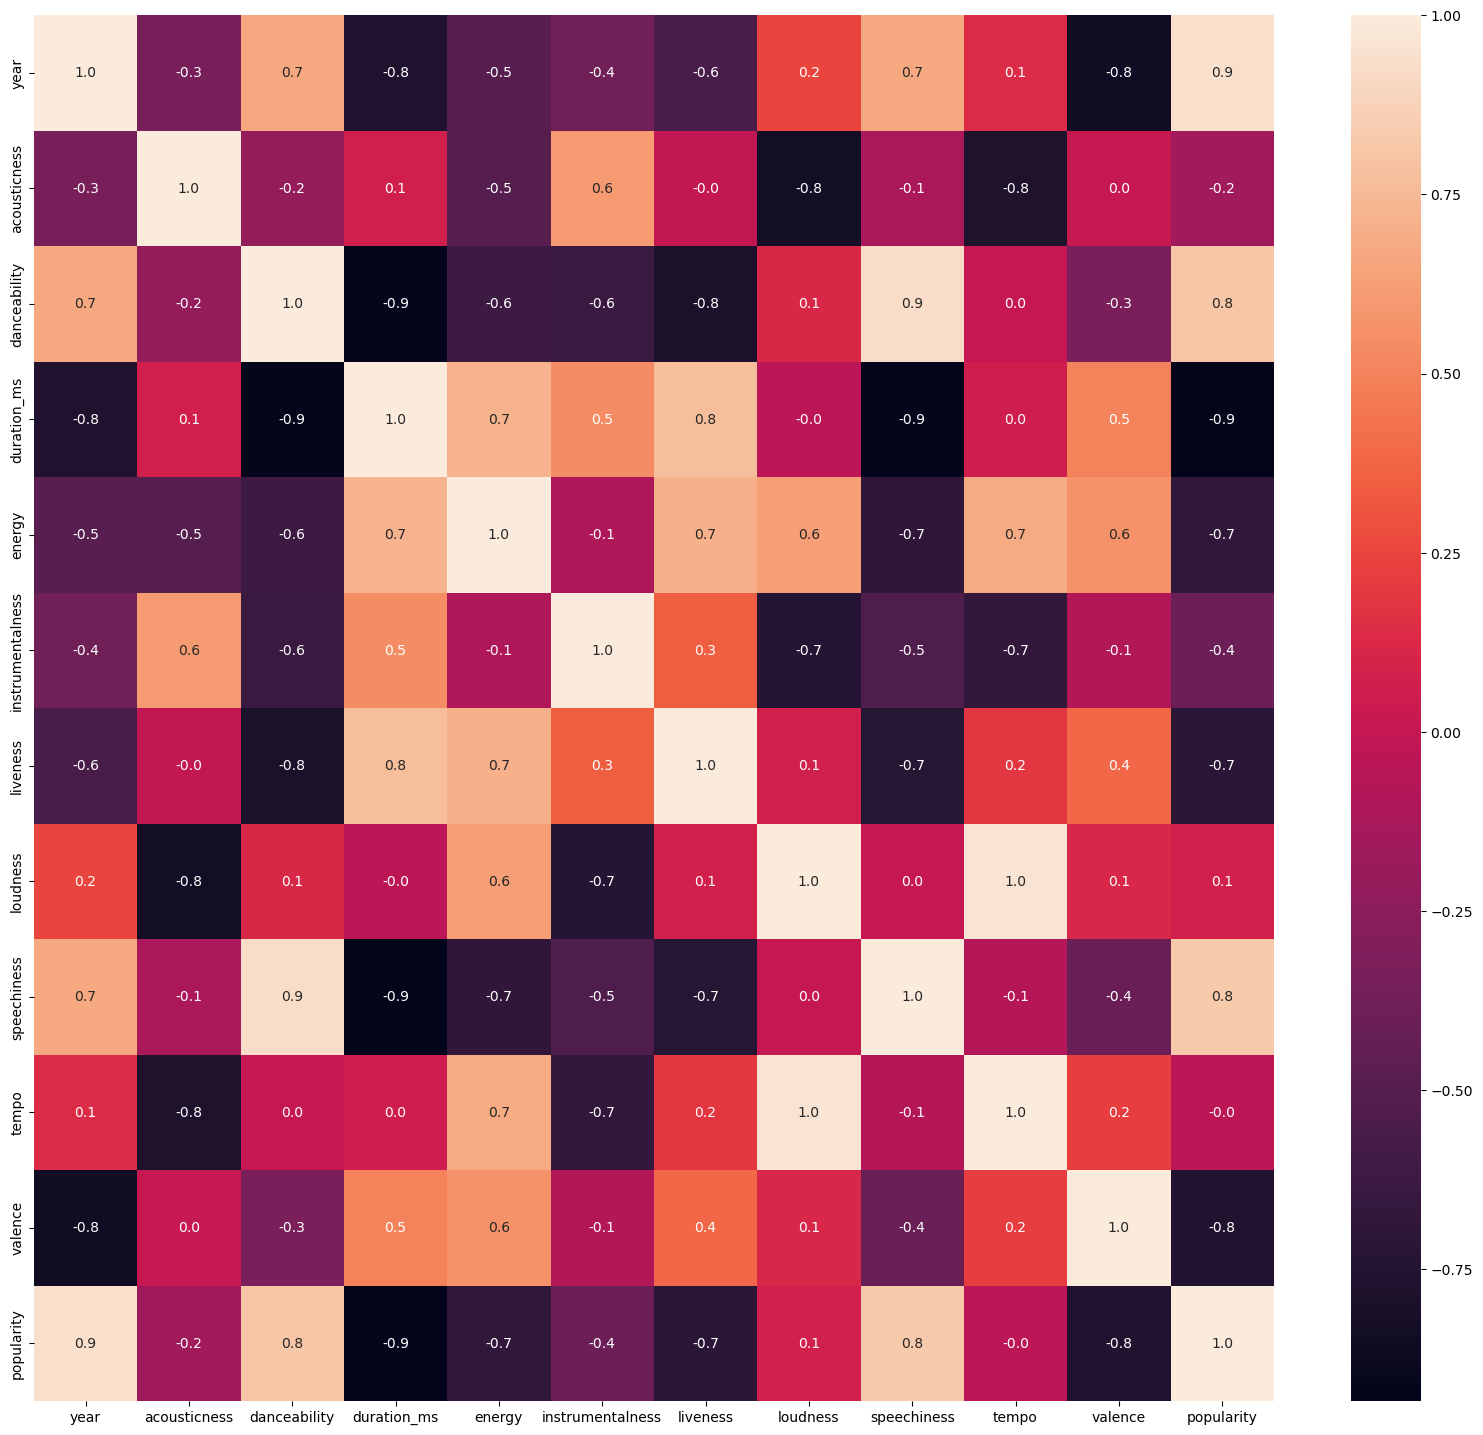

In [5]:
plt.figure(figsize=(20,18))
sns.heatmap(dados_year.corr(), annot=True,fmt = ".1f" )

In [6]:
import numpy as np
np.random.seed(1224)
SEED = (1224)
Pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2, random_state=SEED))])

In [7]:
dados_genero1 = dados_genero.drop(['genres'], axis=1)
genre_embbeding_pca = Pipeline.fit_transform(dados_genero1)
projection  = pd.DataFrame(columns={'X','Y'}, data=genre_embbeding_pca)
projection

X         Y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

In [8]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=10,verbose=True,random_state=SEED, n_init=10)

kmeans_pca.fit(projection)

dados_genero['cluster_pca'] = kmeans_pca.predict(projection)

projection['cluster_pca'] = kmeans_pca.predict(projection)

projection['generos'] = dados_genero['genres']

Initialization complete
Iteration 0, inertia 2503.831624731712
Iteration 1, inertia 2197.4238206015825
Iteration 2, inertia 2124.6023719555947
Iteration 3, inertia 2109.2640057596254
Iteration 4, inertia 2099.9760661516325
Iteration 5, inertia 2092.174862564045
Iteration 6, inertia 2083.633689128421
Iteration 7, inertia 2074.93668034869
Iteration 8, inertia 2067.071815417275
Iteration 9, inertia 2061.6740922482136
Iteration 10, inertia 2056.5676086189933
Iteration 11, inertia 2045.8908906852776
Iteration 12, inertia 2029.6972873826687
Iteration 13, inertia 2011.0245915461128
Iteration 14, inertia 2004.2157571594876
Iteration 15, inertia 2002.4640275616416
Iteration 16, inertia 2001.2406581418497
Iteration 17, inertia 2000.0606617179753
Iteration 18, inertia 1998.1598777568481
Iteration 19, inertia 1996.8203114252992
Iteration 20, inertia 1996.0814661573986
Iteration 21, inertia 1995.4978500372704
Iteration 22, inertia 1995.2903703207492
Iteration 23, inertia 1995.1502211236111
Converge

In [9]:
fig = px.scatter(
    projection, x="X",y= "Y", color="cluster_pca", hover_data=["X","Y","generos"]
)
fig.show()

In [10]:
Pipeline[1].explained_variance_.sum()

5.421597305805701

In [11]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder (dtype = int)

colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop('artists', axis = 1)

dados_musicas_dummies = pd.concat([dados2,pd.DataFrame(colunas_ohe,columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [13]:
from sklearn.pipeline import Pipeline

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])
music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis = 1))
projection_m = pd.DataFrame(data=music_embedding_pca)


In [14]:
pca_pipeline[1].n_components_

612

In [15]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose = False, random_state = SEED)

kmeans_pca_pipeline.fit_transform(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

In [16]:
projection_m['artists'] = dados['artists']
projection_m['song'] = dados['artists_song']

In [17]:
projection_m

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  6.232226e-12 -4.151492e-12 -4.959043e-14           41   
1     -0.030234  1.608076e-12 -2.982306e-12  8.809321e-13           41   
2     -0.012781  1.057140e-12 -3.650675e-12  2.399390e-14           41   
3     -0.040911  4.690674e-13 -5.290135e-12 -2.676961e-12           41   
4     -0.010033  1.289392e-12 -1.825175e-12  3.694547e-13           44   
...         ...           ...           ...           ...          ...   
20306 -0.125947  3.213497e-11 -1.594839e-11 -8.263053e-12           49   
20307  0.000054  7.661028e-12  8.101442e-12 -5.245018e-12           49   
20308 -0.065180  4.460198e-11  6.207227e-11  1.094710e-11           49   
20309  0.108493  2.387390e-11 -2.027579e-11 -1.698184e-11           49   
20310 -0.010372  1.331386e-12 -1.871061e-12  3.708342e-13           44   

             artists                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

In [18]:
fig = px.scatter_3d(
   projection_m, x=0, y=1, z=2, color='cluster_pca',hover_data=['song'])
fig.update_traces(marker_size = 2)
fig.show()

In [19]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

In [20]:
from sklearn.metrics.pairwise import euclidean_distances
nome_musica = 'Ed Sheeran - Shape of You'
cluster = list(projection_m[projection_m['song'] == nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca'] == cluster][[0,1,'song']]
y_musicas = list(projection_m[projection_m['song'] == nome_musica][1])[0]
x_musicas = list(projection_m[projection_m['song'] == nome_musica][0])[0]
print(cluster)

distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musicas,y_musicas]])

musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)

49


In [21]:
recomendada

0         1                                               song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
2826  -0.831891 -2.941406                       Juice WRLD - Hear Me Calling   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
17093 -0.792448 -2.974369                        Joyner Lucas - Will - Remix   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
15388 -0.784530 -2.897926    Pop Smoke - Paranoia (feat. Gunna & Young Thug)   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
17156 -0.846706 -2.863550              KYLE - What It Is (feat. Chris Brown)   
11687 -0.775137 -2.874971              Lil Mosey - G Walk (with Chris Brown)   

                           id    distancias  
2463   7qiZfU4dY1lWllzX7mPBI3  5.960464e-08  
2826   13ZyrkCDmRz5xY3seuAWYk  5.225681e-03  
2942   3Z8FwOEN59mRMxDCtb8N0A  4.521292e-02  
17093  6WI33r2QRxyxttn3KH0XkC  4.892028e-02  
5371   1EWkw4Fa6IlnsAihLUlFFM  4.902470e-02  
15388  3QqJ44HiM84iyZS0G2IKIP  5.953267e-02  
5271   4vUmTMuQqjdnvlZmAH61Qk  5.972798e-02  
18479  2wOXxtHZgRkkrkEbKLzzqs  7.747181e-02  
17156  26rIWI1QTPClaOOI4Kbxhe  7.866172e-02  
11687  7BxpObs6K7Yio5lVb3sMYX  8.290828e-02

In [22]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
    scope = scope,
    redirect_uri = 'http://localhost:5000/callback',
    client_id = '31b2976abdde4214afdce8313f00ab7c',
    client_secret = 'b11e0fe57b1e404f9887be1cafd139d8'
)


In [23]:
client_credentials_manager = SpotifyClientCredentials(client_id='31b2976abdde4214afdce8313f00ab7c', client_secret = 'b11e0fe57b1e404f9887be1cafd139d8')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [24]:
import matplotlib.pyplot as plt
from skimage import io

# nome_musica = 'Ed Sheeran - Shape of You'

# id = dados[dados['artists_song'] == nome_musica]['id'].iloc[0]
# track = sp.track(id)
# url = track['album']['images'][1]['url']
# name = track['name']
# image = io.imread(url)
# plt.imshow(image)
# plt.xlabel(name,fontsize = 10)
# plt.show()

In [25]:
def recomenda_id (playlist_id):
    url = []
    name = []
    for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]['images'][1]['url'])
        name.append(track['name'])
    return name,url



In [26]:
name,url = recomenda_id(recomendada['id'])

In [27]:
name

['Shape of You',
 'Hear Me Calling',
 'Be Kind (with Halsey)',
 'Will - Remix',
 'WRONG (feat. Lil Mosey)',
 'Paranoia (feat. Gunna & Young Thug)',
 'South of the Border (feat. Camila Cabello & Cardi B)',
 '1.5',
 'What It Is (feat. Chris Brown)',
 'G Walk (with Chris Brown)']

In [28]:

url

['https://i.scdn.co/image/ab67616d00001e02ba5db46f4b838ef6027e6f96',
 'https://i.scdn.co/image/ab67616d00001e02af149eb4002f65f83afc63c4',
 'https://i.scdn.co/image/ab67616d00001e02fdf2e993e10e67396b3bf759',
 'https://i.scdn.co/image/ab67616d00001e024ac196312c24faedb76a345e',
 'https://i.scdn.co/image/ab67616d00001e02891f0552bed344dc2bfe322f',
 'https://i.scdn.co/image/ab67616d00001e0246e1307c35579c3483ea7b03',
 'https://i.scdn.co/image/ab67616d00001e0273304ce0653c7758dd94b259',
 'https://i.scdn.co/image/ab67616d00001e02280689ecc5e4b2038bb5e4bd',
 'https://i.scdn.co/image/ab67616d00001e02b46b5fb6fdc6f5c720fcb183',
 'https://i.scdn.co/image/ab67616d00001e0232ba22ba4df6a89bb6bfe3cf']

In [29]:
def visualize_songs(name,url):
    plt.figure(figsize=(15,10))
    columns = 5
    for i ,u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1,columns,i +1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 8)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.tick_params(bottom = False)
        plt.grid(visible=None)
        plt.subplots_adjust(wspace=0.05, hspace=0.08)
        plt.grid(visible=None, which='major', axis='y')
    plt.show()


In [30]:
# visualize_songs(name,url)

In [31]:
def recomendador (nome_musica):
    cluster = list(projection_m[projection_m['song'] == nome_musica]['cluster_pca'])[0]
    musicas_recomendadas = projection_m[projection_m['cluster_pca'] == cluster][[0,1,'song']]
    y_musicas = list(projection_m[projection_m['song'] == nome_musica][1])[0]
    x_musicas = list(projection_m[projection_m['song'] == nome_musica][0])[0]
    print(cluster)

    distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musicas,y_musicas]])

    musicas_recomendadas['id'] = dados['id']
    musicas_recomendadas['distancias'] = distancias
    recomendada = musicas_recomendadas.sort_values('distancias').head(10)
    plt.figure(figsize=(15,10))
    columns = 5
    for i ,u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1,columns,i +1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 8)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.tick_params(bottom = False)
        plt.grid(visible=None)
        plt.subplots_adjust(wspace=0.05, hspace=0.08)
        plt.grid(visible=None, which='major', axis='y')
    plt.show()



49


PermissionError: [WinError 32] O arquivo já está sendo usado por outro processo: 'C:\\Users\\Enrico\\AppData\\Local\\Temp\\tmpcv942ikp'

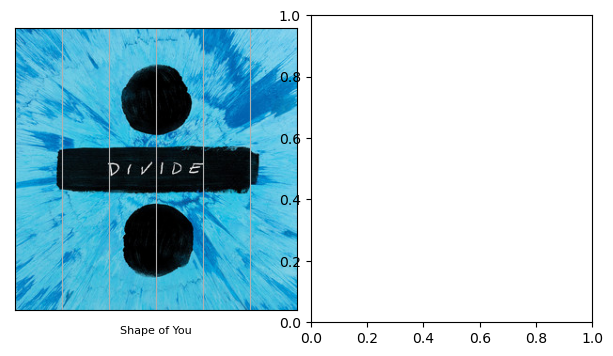

In [32]:
recomendador('Ed Sheeran - Shape of You')